# Using NumPy arrays with one-dimensional data

## What is NumPy? 

Numerical Python (NumPy) is a Python library providing a fast and space-efficient data structure: the <code>ndarray</code>, a **homogeneous** array structure, indexed with integers.
The official documentation is <a href="http://www.numpy.org/">here</a>.

## Creating arrays

You can create an empty array. Simply import numpy and use following constructors: <code>array</code>, <code>arange</code>, <code>ones</code>, <code>zeros</code> or <code>empty</code>. 

In [2]:
import numpy as np # Everybody uses np as shorthand...
# Now we can create arrays from any sequence-like object:
L = [10, 5, 6, 8, -2]
T = (10, 5, 6, 9, -2)
a = np.array(L)
b = np.array(T)
print a
print b


[10  5  6  8 -2]
[10  5  6  9 -2]


In [3]:
# If you create it with empty, the values are arbitrary (not random, not necessarily zero).
nothing = np.empty(10)
nothing

array([  0.00000000e+000,  -1.28822983e-231,   2.20699090e-314,
         2.20693629e-314,   2.20665280e-314,   2.20693404e-314,
         2.15210873e-314,   0.00000000e+000,   2.20564859e-314,
         2.15210876e-314])

You can create arrays based on the lenght of other arrays, e.g. with the <code>ones_like</code> function.

In [4]:
#Create an array of ones with the same lenght as this one:
L = [2, 3, 4, 6, 4, 3, 2]
b = np.ones(len(L))
a = np.ones_like(L)
a

array([1, 1, 1, 1, 1, 1, 1])

You can also create ranges with <code>arange</code>.

In [5]:
# Create an array with the even numbers 
# between (and including) 200 and 250.
a = np.arange(200, 251, 2)
a

array([200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224,
       226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250])

The function <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html">linspace</a> allows for controlling the amount of numbers to generate.

In [6]:
np.linspace(2.0, 3.0, num=5)

array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])

## Arrays have types

The <code>dtype</code> attribut of an array returns the type of its elements.

In [7]:
ones = np.ones(5)
print type(ones[0])
print ones
print ones.dtype
print ones.itemsize

<type 'numpy.float64'>
[ 1.  1.  1.  1.  1.]
float64
8


NumPy arrays have a single element type for all its values. 

In [8]:
L = [1, 4.6, 5]
a = np.array(L)
print a.dtype

float64


We can **explicitly** indicate the type we want for a NumPy array.

In [9]:
#What happened with the numbers? 
L = [1, 4.6, 5]
a = np.array(L, dtype="int32")
print a.dtype
print a

int32
[1 4 5]


NumPy element types are not the same as the standard data types of Python. 

In [10]:
L = ["this", "is", "an", "array555rrrr"]
a = np.array(L)
print a.dtype
#TODO: Now interpret the type... look in the documentation of NumPy data types. 

|S12


You can convert the type of an array using <code>as_type</code> operation.

In [12]:
#Convert form float to int with astype:
a = np.array([5.7, 4.2, 3.0])
b = a.astype(np.int32)
print b

#Try to convert this array of strings to some kind of integer array:
a = np.array(["23", "12", "nan", "32", "10"])
print a
b = a.astype(np.int32)

[5 4 3]
['23' '12' 'nan' '32' '10']


ValueError: invalid literal for int() with base 10: 'nan'

## Vectorization!

In general, operations of arrays with scalars are **vectorized**, i.e. they are applied to each element.

In [13]:
x = np.ones(10)
x = x*2
print x

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


And if we apply operation between arrays of the same shape (size) they are applied element-wise.

In [14]:
y = np.ones(10)
y + x

array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

In [15]:
# Arrays need to be same size:
z = np.ones(5)
x+z

ValueError: operands could not be broadcast together with shapes (10,) (5,) 

Now an exercise!

In [16]:
# create an array of 20 numbers between 5 and 10 using a gamma distribution, print them 
# and later increase them in a 20% (you have to find the numpy function for that in the docs)
shape, scale = 2., 2. # mean and dispersion
r = np.random.gamma(shape, scale, 20)
print r
r = r*1.2
print r

[  3.74993001  10.02055911   2.34997228   5.36116543   0.51347329
   3.37018834   1.46547792   5.00554218   8.53071198   3.97964266
   7.09253903   3.67100234   5.18942902   2.36053632   7.88357028
   8.9719898    1.47078779   0.28450061   1.19898825   2.73032099]
[  4.49991601  12.02467094   2.81996673   6.43339851   0.61616794
   4.04422601   1.7585735    6.00665061  10.23685437   4.77557119
   8.51104684   4.4052028    6.22731482   2.83264359   9.46028433
  10.76638776   1.76494535   0.34140073   1.4387859    3.27638518]


## Basic graphing

You can use matplotlib as usual. Now let's generate more random numbers.

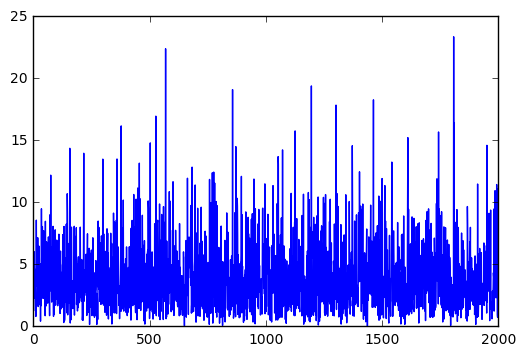

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
#Re-generate the previous array but with 2000 elements and plot it
r = np.random.gamma(shape, scale, 2000)
plt.plot(r)

But for plotting the histogram, you need to do it other way...

(array([ 20.,  30.,  42.,  89.,  70.,  73.,  82.,  89.,  99.,  73.,  81.,
         85.,  68.,  92.,  67.,  74.,  68.,  55.,  68.,  47.,  51.,  57.,
         42.,  39.,  46.,  42.,  25.,  34.,  22.,  23.,  18.,  20.,  15.,
         15.,  18.,  17.,  15.,   8.,  13.,   8.,  14.,   9.,   7.,  10.,
          4.,   7.,   3.,   2.,   4.,   4.,   4.,   2.,   2.,   2.,   1.,
          1.,   2.,   2.,   1.,   1.,   1.,   1.,   3.,   1.,   0.,   1.,
          0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]), array([  0.03908509,   0.27229379,   0.50550249,   0.73871119,
          0.97191989,   1.20512859,   1.43833729,   1.67154599,
          1.90475469,   2.1379634 ,   2.3711721 ,   2.6043808 ,
          2.8375895 ,   3.0707982 ,   3.3040069 ,   3.5372156 ,
          3.7704243 ,   4.003633  ,   4.2368417 ,   4.4700504 ,

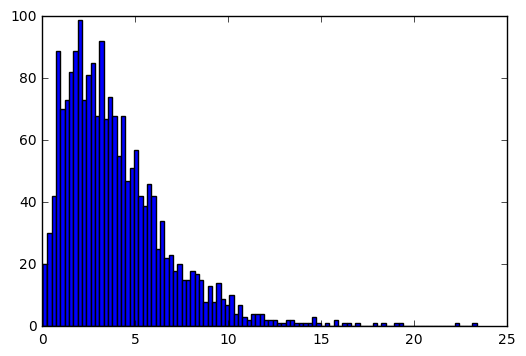

In [18]:
# TODO: Search in the docs of the pyplot object a way to plot a histogram. 
# You should particularly read what "bins" are as this influence the plotting of histograms. 
plt.hist(r, bins=100)

Check if this looks like a Gamma distribution with the given parameters :-)

## Using statistical libraries: analysis of variance

Create three arrays of the same size, two with a Gamma distribution, and one with an exponential distribution. Print their variances.

In [19]:
#Create three arrays of 200 random elements, two with Gamma and one exponential. 
# Print variances.
a = np.random.gamma(0.25, 0.3, 200)
b = np.random.gamma(0.3, 0.35, 200)
c = np.random.exponential(0.7, 200)
print a.var(), b.var(), c.var(), b.var()

0.0176395551519 0.0149299558867 0.639316513306 0.0149299558867


And now let's do the analysis of variance.

In [20]:
# Check analysis of variance between each pair of arrays and comment the results.
# Note and read the assumptions of ANOVA, to see if they fit in this case.
from scipy.stats import kruskal
# In the first case, the p-value is relatively high which means they do not have different medians. 
h_val, p_val = kruskal(a, b)
print h_val, p_val
# In the second case, the p-value is very low, which means we reject the null hypothesis that 
# they come from the same population...
h_val, p_val = kruskal(b, c)
print h_val, p_val

8.51661546135 0.00351918381207
200.285569077 1.80931652773e-45


Now do the same check with two random samples normally distributed...

## Indexing and slicing

You can index and slice numpy arrays just as you do with Python lists. If you assign a value to an slice, it gets propagated to all the cells.

In [ ]:
#Create an array of ten ones, then slice the second half and set all the elements
#in the slice to zero.
o = np.ones(10)
print o
o[5:]=0
print o

A very important aspect of slicing is that **it creates views, not copies**

In [ ]:
#Create a slice of the four elements in the middle of the above array 
# and use a new variable to reference it.
# Then assign the value 2 to the new reference and print the original.
sl = o[3:7]
print sl
sl[:] = 4
print sl
z = sl.copy()
print o
print z

## Boolean arrays

You can use boolean expressions to get boolean arrays.

In [ ]:
# Assign scores in a class of 15 students for two assignments.
# Create two arrays with the scores of the students using a normal distribution.
assig1 = np.random.normal(5, 2, 15)
assig2 = np.random.normal(5, 2, 15)

#TODO Round all the scores to one decimal. 
assig1 = assig1.round(1)
assig2 = assig2.round(1)
print assig1
print assig2

In [ ]:
assig1 >= 5

In [ ]:
# Now let's think that only the students that passed the first assignment will 
# have the second considered.
# Get a boolean array for the students that passed the first assignement. 
passed1 = assig1 >= 5.0
print passed1

# Now get the mean of the two assignments per each of the students that passed the first one.
print ((assig2+assig1)/2)[passed1]

## Playing with ufuncs

Universal functions (ufuncs) are vectorized operations on NumPy arrays. Let's plot some functions implemented with ufuncs. The complete list is here: http://docs.scipy.org/doc/numpy/reference/ufuncs.html 

In [ ]:
import numpy as np
#TODO: Create an array of 50 elements between 1 and 100 using linspace. Look
# at the documentation of this function.
x = np.linspace(1, 100)
print len(x)

# Get the sin of each of the generated points and plot them.
y = np.sin(x)
plt.plot(x,y)

You can plot several arrays in the same plot. 

In [ ]:
# TODO: Plot the same as above, plus the square of the sin values. 
# Look in the docs how you can pass more than one array to plot, and how to draw the second 
# with a different color, e.g. red.
plt.plot(x, y, x, y**2, 'r-^')

You can also generate random points and do scaterplotting

In [ ]:
#TODO: generate two arrays of the same size using a random generator with gamma dstribution.
a = np.random.gamma(3,2, 100)
b = np.random.gamma(3,2, 100)

# Plot the two arrays as a scatterplot.
plt.scatter(a,b)

Summarization operations are implemented also.

In [ ]:
b.mean()

In [ ]:
np.sqrt(b)

This is a key reference:
http://wiki.scipy.org/Numpy_Example_List